# PART 1 - SIMULATOR: Simplified model (Park et al. 2021):

The flow chart of the calculation procedure for the simplified model follows the procedure of Park, et al. (2021).

<img src="figures/flow_chart_partIandII.png" width="300">

## 1. Heat transmitted to sensible heat

<img src="figures/eq1.png" width="300">

1.1 Diffusion of a Gaussian Function

https://fenicsproject.org/pub/tutorial/html/._ftut1006.html

<img src="figures/eq2.png" width="300">

where the local temperature is defined by $u$.


1.2. Heat equation

https://fenics-handson.readthedocs.io/en/latest/heat/doc.html

<img src="figures/eq3.png" width="300">

1.3. Heat equation in moving media

<img src="figures/eq4.png" width="300">


## Some references

https://fenicsproject.discourse.group/t/heat-equation-with-insulating-material/1325

https://home.simula.no/~hpl/homepage/fenics-tutorial/release-1.0-nonabla/webm/timedep.html

https://www.karlin.mff.cuni.cz/~hron/fenics-tutorial/heat/doc.html

https://fenicsproject.discourse.group/t/transient-heat-conduction-problem/10625

https://stackoverflow.com/questions/51763982/solving-the-heat-equation-by-fenics

https://mediatum.ub.tum.de/doc/1467488/1467488.pdf

## Preliminary Heat transfer Analysis.

The Heat transfer equation can be studied following the technoques for solving the Poisson equation, under a set of initial and boundary conditions of bio-pharmaceutical lyophilization:


Plotting Mesh


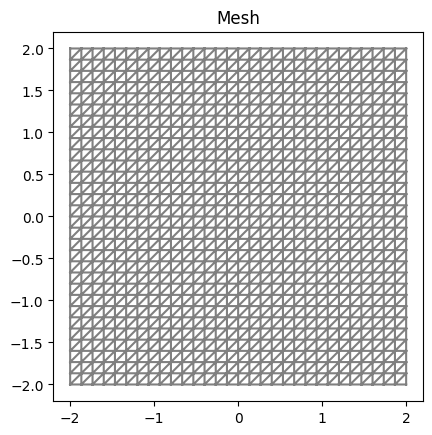

In [2]:
# Import libraries
# from fenics import *
import fenics
import matplotlib.pyplot as plt

# Import time
T = 2.0            # final time
num_steps = 50     # number of time steps
dt = T / num_steps # time step size

# Create mesh and define function space
nx = ny = 30
mesh = fenics.RectangleMesh(fenics.Point(-2, -2), fenics.Point(2, 2), nx, ny)

print("Plotting Mesh")
fenics.plot(mesh, title="Mesh")

t = 0.04
n = 0 of 50
Solving linear variational problem.
t = 0.08
n = 1 of 50
Solving linear variational problem.
t = 0.12
n = 2 of 50
Solving linear variational problem.
t = 0.16
n = 3 of 50
Solving linear variational problem.
t = 0.2
n = 4 of 50
Solving linear variational problem.
t = 0.24000000000000002
n = 5 of 50
Solving linear variational problem.
t = 0.28
n = 6 of 50
Solving linear variational problem.
t = 0.32
n = 7 of 50
Solving linear variational problem.
t = 0.36
n = 8 of 50
Solving linear variational problem.
t = 0.39999999999999997
n = 9 of 50
Solving linear variational problem.
t = 0.43999999999999995
n = 10 of 50
Solving linear variational problem.
t = 0.4799999999999999
n = 11 of 50
Solving linear variational problem.
t = 0.5199999999999999
n = 12 of 50
Solving linear variational problem.
t = 0.5599999999999999
n = 13 of 50
Solving linear variational problem.
t = 0.6
n = 14 of 50
Solving linear variational problem.
t = 0.64
n = 15 of 50
Solving linear variational proble

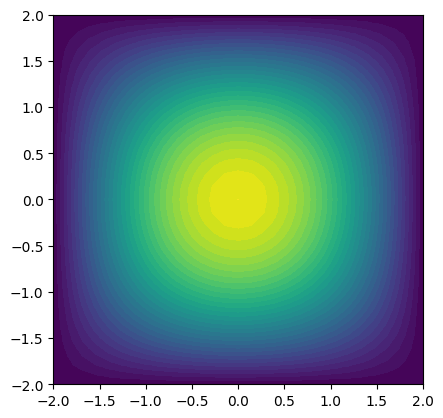

In [2]:
# Define function space
V = fenics.FunctionSpace(mesh, 'P', 1)

# Define boundary condition
def boundary(x, on_boundary):
    return on_boundary

bc = fenics.DirichletBC(V, fenics.Constant(0), boundary)

# Define initial value
u_0 = fenics.Expression('exp(-a*pow(x[0], 2) - a*pow(x[1], 2))',
                 degree=2, a=5)
u_n = fenics.interpolate(u_0, V)

# Define variational problem
u = fenics.TrialFunction(V)
v = fenics.TestFunction(V)
f = fenics.Constant(0)

F = u*v*fenics.dx + dt*fenics.dot(fenics.grad(u), fenics.grad(v))*fenics.dx - (u_n + dt*f)*v*fenics.dx
a, L = fenics.lhs(F), fenics.rhs(F)

# Create VTK file for saving solution
vtkfile = fenics.File('heat_gaussian/solution.pvd')

# Time-stepping
u = fenics.Function(V)
t = 0

for n in range(num_steps):

    # Update current time
    t += dt
    print(f't = {t}')
    print(f'n = {n} of {num_steps}')

    # Compute solution
    fenics.solve(a == L, u, bc)

    # Save to file and plot solution
    vtkfile << (u, t)
    fenics.plot(u)

    # Update previous solution
    u_n.assign(u)


Navier-Stokes equations

https://fenics-handson.readthedocs.io/en/latest/navierstokes/doc.html
https://home.simula.no/~hpl/homepage/fenics-tutorial/release-1.0-nonabla/webm/

# LYOPHILIZATION EXERCISE AND APPROXIMATIONS

https://www.studocu.com/bo/document/universidad-mayor-de-san-simon/laboratorio-de-quimica/chapter-lyophilization/28384324

https://books.google.com.br/books?id=c5yMHputGh4C&pg=PA644&lpg=PA644&dq=karel+m+heat+and+mass+transfer+in+freeze-drying+//+freeze+drying+and+advanced+food+technology-+goldblith&source=bl&ots=u2_-plp5du&sig=ACfU3U1OSw25YvmDXHnCo1Ltbaov6q_hWw&hl=en&sa=X&ved=2ahUKEwi4v9SXl9OBAxV3j5UCHUEZD4EQ6AF6BAhuEAM#v=onepage&q=karel%20m%20heat%20and%20mass%20transfer%20in%20freeze-drying%20%2F%2F%20freeze%20drying%20and%20advanced%20food%20technology-%20goldblith&f=false


# Park et al. (2021) Implementation

https://github.com/lazovasquez/microwave-freeze-drying

Plotting Mesh


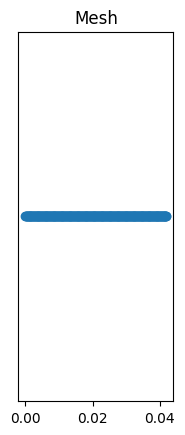

In [1]:
# Import libraries
from fenics import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Parameters
density1=63
density2=917
cp2=1967.8
k2=2.30
Tsub=256.15  # Sublimation temperature
Hsub=2.840e6
pbwi=0.04
pw=0.92
picei=1-pbwi
Hw = 242345
htc=65  # Heat transfer coefficient # W/m^2K # Hottot 2007
Tshelf_i=236.85  # Initial shelf temperature
Tshelf_f=281.85  # Final shelf temperature
Tshelf_r=1/60  # Shelf temperature rising

# import time
T = 3600.0            # final time
num_steps = 50     # number of time steps
dt = T / num_steps # time step size

# Create mesh and define function space
Length=0.042
edge_n=300; # number of edges
nx = ny = 300

# Calculate term
a = (-Tshelf_r * density2 * cp2 + Hw * pbwi) / (2 * k2) 

# # Square mesh
# mesh = RectangleMesh(Point(0, 0), Point(Length, Length), nx, ny)

# Interval mesh
mesh = IntervalMesh (nx, 0, Length)

print("Plotting Mesh")
plot(mesh, title="Mesh")

# Resolução CFD

In [ ]:
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, Constant(0), boundary)

# Define initial value
u_0 = Expression('exp(-a*pow(x[0], 2) - a*pow(x[1], 2))',
                 degree=2, a=5)
u_n = interpolate(u_0, V)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

# Create VTK file for saving solution
vtkfile = File('heat_gaussian/solution.pvd')

# Time-stepping
u = Function(V)
t = 0

for n in range(num_steps):

    # Update current time
    t += dt
    print(f't = {t}')
    print(f'n = {n} of {num_steps}')

    # Compute solution
    solve(a == L, u, bc)

    # Save to file and plot solution
    vtkfile << (u, t)
    plot(u)

    # Update previous solution
    u_n.assign(u)
